In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading dataset
url = 'https://raw.githubusercontent.com/RutujaHake01/CODSOFT/main/MovieRatingPrediction/IMDb%20Movies%20India.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB

Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [ ]:
# Data Preprocessing
# Drop rows where Rating is missing
df = df.dropna(subset=['Rating'])

In [ ]:
# Clean duration (convert "110 min" to 110 as int)
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float)

In [ ]:
# Fill missing Duration with median
df['Duration'].fillna(df['Duration'].median(), inplace=True)

In [ ]:
# Fill missing values in categorical columns with "Unknown"
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col].fillna("Unknown", inplace=True)

In [ ]:
# Show updated missing values
print("\nMissing Values After Preprocessing:")
print(df.isnull().sum())


Missing Values After Preprocessing:
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [ ]:
# Frequency Encoding
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    freq = df[col].value_counts().to_dict()
    df[col + '_FE'] = df[col].map(freq)

# One-hot encode Genre
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

# Feature set
features = ['Duration', 'Director_FE', 'Actor 1_FE', 'Actor 2_FE', 'Actor 3_FE'] + \
           [col for col in df.columns if col.startswith('Genre_')]

X = df[features]
y = df['Rating']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


 Linear Regression
MAE: 1.06 | RMSE: 1.32 | R²: 0.06

 Random Forest
MAE: 1.12 | RMSE: 1.44 | R²: -0.12

 XGBoost
MAE: 1.03 | RMSE: 1.29 | R²: 0.10


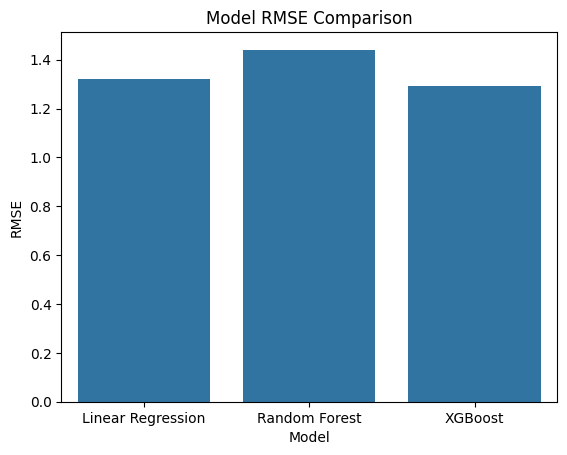

In [ ]:
# Model Evaluation
def evaluate_model(name, model, X_t, y_t):
    pred = model.predict(X_t)
    mae = mean_absolute_error(y_t, pred)
    rmse = np.sqrt(mean_squared_error(y_t, pred))
    r2 = r2_score(y_t, pred)
    print(f"\n {name}")
    print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

results = []
results.append(evaluate_model("Linear Regression", lr, X_test_scaled, y_test))
results.append(evaluate_model("Random Forest", rf, X_test, y_test))
results.append(evaluate_model("XGBoost", xgb, X_test, y_test))

results_df = pd.DataFrame(results)

# Plot comparison
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Model RMSE Comparison')
plt.show()


In [ ]:
# Prediction using user input
def predict_user_rating():
    print('\n Enter movie details for prediction')

    genre = input("Genre (e.g. Comedy): ").strip()
    duration = float(input("Duration (in minutes): "))
    director = input("Director: ").strip()
    actor = input("Lead Actor: ").strip()

    director_freq = df['Director'].value_counts().to_dict()
    actor_freq = df['Actor 1'].value_counts().to_dict()

    input_data = {
        'Duration': duration,
        'Director_FE': director_freq.get(director, 1),
        'Actor 1_FE': actor_freq.get(actor, 1),
        'Actor 2_FE': 1,
        'Actor 3_FE': 1
    }

    for col in X.columns:
        if col.startswith('Genre_'):
            input_data[col] = 1 if col == f"Genre_{genre}" else 0

    for feat in X.columns:
        if feat not in input_data:
            input_data[feat] = 0

    user_df = pd.DataFrame([input_data])
    user_scaled = scaler.transform(user_df)

    pred = xgb.predict(user_scaled)[0]
    print(f"\n Predicted IMDb Rating: {pred:.2f} / 10")

predict_user_rating()



 Enter movie details for prediction
Genre (e.g. Comedy): romance
Duration (in minutes): 180
Director: karan johar
Lead Actor: Shahrukh Khan

 Predicted IMDb Rating: 4.02 / 10
